# Visualising Bathymatry from ICESAT-2 data




# 1. Imports

In [1]:
import os

import geopandas
import numpy
from shapely.geometry import Polygon

%matplotlib inline
import matplotlib.pyplot as plt


# 2. Specify the input layers

In [2]:
vec_file = "../data/is2_bathy/is2_bermuda_depth.gpkg"

vec_lyr_path1 = "ic2_depth_bermuda_path1"
vec_lyr_path2 = "ic2_depth_bermuda_path2"
vec_lyr_path3 = "ic2_depth_bermuda_path3"
vec_lyr_path4 = "ic2_depth_bermuda_path4"
vec_lyr_path5 = "ic2_depth_bermuda_path5"
vec_lyr_path6 = "ic2_depth_bermuda_path6"
vec_lyr_path7 = "ic2_depth_bermuda_path7"
vec_lyr_path8 = "ic2_depth_bermuda_path8"


# 3. Read Layer to Data Frame

In [3]:
path1_gpd_df = geopandas.read_file(vec_file, layer=vec_lyr_path1)
path1_gpd_df

,field_1,Longitude,Latitude,PhotonHeig,Depth,LandConfid,geometry
0,0,330534.74964,3.575675e+06,-4.528613,-4.782535,-1,POINT (330534.750 3575675.343)
1,1,330534.46428,3.575679e+06,-3.525469,-3.779392,-1,POINT (330534.464 3575678.871)
2,2,330533.69081,3.575688e+06,-3.859086,-4.113008,-1,POINT (330533.691 3575688.059)
3,3,330532.69144,3.575701e+06,-3.008932,-3.262854,-1,POINT (330532.691 3575700.737)
4,4,330531.90601,3.575711e+06,-4.282633,-4.536555,-1,POINT (330531.906 3575710.601)
...,...,...,...,...,...,...,...
11375,11375,329202.44839,3.592284e+06,-7.953201,-8.207124,4,POINT (329202.448 3592283.854)
11376,11376,329202.32185,3.592285e+06,-8.135677,-8.389600,4,POINT (329202.322 3592285.259)
11377,11377,329202.32253,3.592285e+06,-8.039972,-8.293894,4,POINT (329202.323 3592285.259)
11378,11378,329202.26020,3.592286e+06,-7.981982,-8.235905,1,POINT (329202.260 3592285.960)


# 4. Visualise Path 1

<AxesSubplot:>

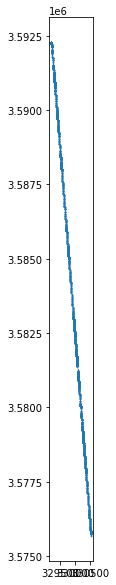

In [4]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
path1_gpd_df.plot(ax=ax, marker='.', markersize=0.5)

# 5. Subset the Path for Plotting

## 5.1 Define the BBOX

<AxesSubplot:>

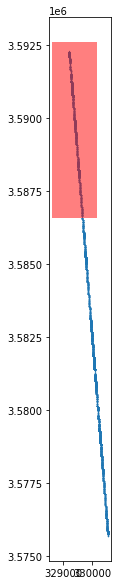

In [5]:
min_x = 328622
max_x = 330146
min_y = 3586577
max_y = 3592615

# Create a custom polygon
sub_poly = Polygon([(min_x, max_y), (max_x, max_y), (max_x, min_y), (min_x, min_y), (min_x, max_y)])
sub_poly_gdf = geopandas.GeoDataFrame([1], geometry=[sub_poly], crs=path1_gpd_df.crs)

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
path1_gpd_df.plot(ax=ax, marker='.', markersize=0.5)
sub_poly_gdf.plot(ax=ax, color='red', alpha=0.5)

## 5.2 Subset the GeoDataFrame

Use the clip function.


In [6]:
path1_gpd_df_sub = path1_gpd_df.clip(sub_poly)
path1_gpd_df_sub

,field_1,Longitude,Latitude,PhotonHeig,Depth,LandConfid,geometry
11310,11310,329204.93335,3.592253e+06,-7.492609,-7.746532,2,POINT (329204.933 3592252.800)
11311,11311,329204.87790,3.592254e+06,-7.617925,-7.871847,0,POINT (329204.878 3592253.507)
11313,11313,329204.87731,3.592254e+06,-7.700728,-7.954651,4,POINT (329204.877 3592253.507)
11314,11314,329204.87621,3.592254e+06,-7.854465,-8.108388,0,POINT (329204.876 3592253.507)
11312,11312,329204.87117,3.592254e+06,-8.555969,-8.809891,0,POINT (329204.871 3592253.510)
...,...,...,...,...,...,...,...
7454,7454,329644.14007,3.586764e+06,-17.301731,-17.555653,3,POINT (329644.140 3586763.679)
7455,7455,329644.13640,3.586764e+06,-17.813507,-18.067430,0,POINT (329644.136 3586763.681)
7457,7457,329643.97249,3.586766e+06,-16.980864,-17.234786,0,POINT (329643.972 3586765.796)
7458,7458,329643.90381,3.586767e+06,-18.668739,-18.922661,0,POINT (329643.904 3586766.507)


## 5.3 Plot the subset

<AxesSubplot:>

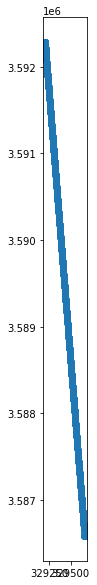

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
path1_gpd_df_sub.plot(ax=ax)

# 6. Plot Depth values

## 6.1 Get Depth and Latitude Values

In [8]:
# Get the latidude and depth values to create scatter plot.
depth_vals = path1_gpd_df_sub["Depth"].values
lat_vals = path1_gpd_df_sub["Latitude"].values

## 6.2 Plot the Depths

The blue line is the water surface while the black points are the depths below the surface. Note, the scale in the x and y axis of the plot are different so bare that in mind when interpreting the plot.

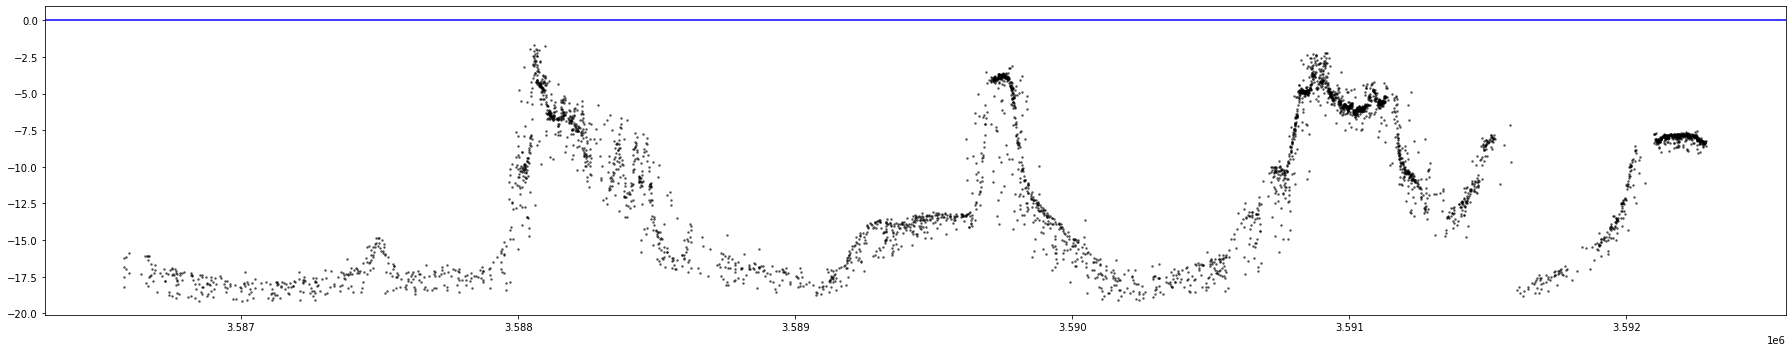

In [9]:
# Plot the data
fig, ax = plt.subplots(1, 1, figsize=(25, 5))
ax.scatter(lat_vals, depth_vals, s=10, marker=".", color='black', alpha=0.5)
ax.axhline(y=0.0, color='blue', linestyle='-')
fig.tight_layout()